In [ ]:
from typing import TypedDict

class ElephantState(TypedDict):
    fridge_open: bool
    elephant_inside: bool

In [6]:
def open_fridge(state: ElephantState) -> ElephantState:
    print("打开冰箱门")
    state["fridge_open"] = True

    return state

def put_elephant(state: ElephantState) -> ElephantState:
    if not state["fridge_open"]:
        raise ValueError("冰箱门未打开，无法放入大象！")

    print("将大象放入冰箱")
    state["elephant_inside"] = True

    return state

def close_fridge(state: ElephantState) -> ElephantState:
    if not state["elephant_inside"]:
        raise ValueError("大象没有放入冰箱，不能关闭冰箱门！")

    print("关闭冰箱门")
    state["fridge_open"] = False
    return state

In [14]:
from langgraph.graph.state import CompiledStateGraph, StateGraph
from langgraph.constants import START, END

def build_graph() -> CompiledStateGraph:
    graph = StateGraph(ElephantState)
    # Node
    graph.add_node("open_fridge", open_fridge)
    graph.add_node("put_elephant", put_elephant)
    graph.add_node("close_fridge", close_fridge)
    # Edge
    graph.add_edge(START, "open_fridge")
    graph.add_edge("open_fridge", "put_elephant")
    graph.add_edge("put_elephant", "close_fridge")
    graph.add_edge("close_fridge", END)

    return graph.compile()

打开冰箱门
将大象放入冰箱
关闭冰箱门


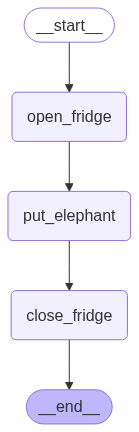

In [18]:
def run_workflow():
    graph = build_graph()
    initial_state = ElephantState(fridge_open=False, elephant_inside=False)
    result = graph.invoke(initial_state)

    return result

run_workflow()